In [21]:
from matplotlib import pyplot as plt

In [35]:
from skimage.color import rgb2gray
profile_image = plt.imread('images/profile_image.jpg')
profile_image = rgb2gray(profile_image)

In [36]:
from skimage.segmentation import slic

In [45]:
segments = slic(profile_image, start_label=1, n_segments=100)

In [46]:
from skimage.color import label2rgb

In [47]:
segmented_image = label2rgb(segments, profile_image, kind='avg', bg_label=0)

In [48]:
from skimage import data
from skimage.feature import Cascade

In [49]:
trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)

In [53]:
# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

In [54]:
from matplotlib import patches

def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle((patch['c'], patch['r']),
                            patch['width'],
                            patch['height'],
                            fill=False,
                            color='r',
                            linewidth=2))
    plt.show()

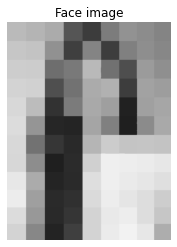

In [55]:
show_detected_face(segmented_image, detected)